In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# 1_Simple_Linear_Regression-means only 1 variable x1

In [2]:
df1=pd.DataFrame({'exprience':[1,2,4,  3,7,9,   5,10],
                    'salary': [3,4,5,  5,5,9,   9,12]})
df1

,exprience,salary
0,1,3
1,2,4
2,4,5
3,3,5
4,7,5
5,9,9
6,5,9
7,10,12


In [3]:
X=df1.drop('salary',axis=1)
y=df1['salary']

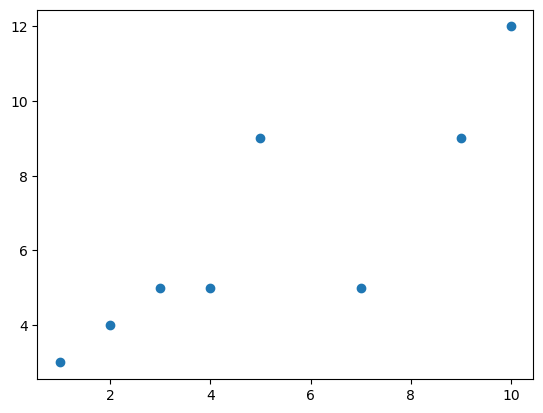

In [4]:
plt.scatter(X.exprience,y)

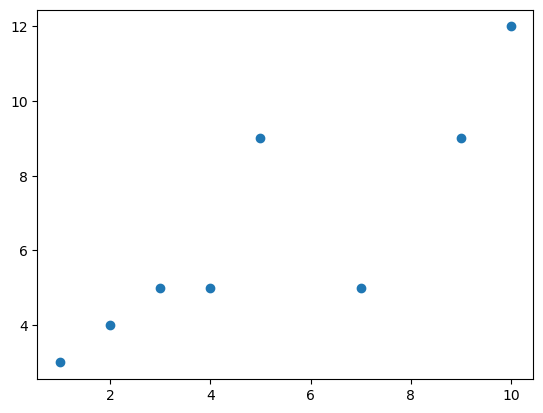

In [5]:
plt.scatter(X,y) # there is no diff

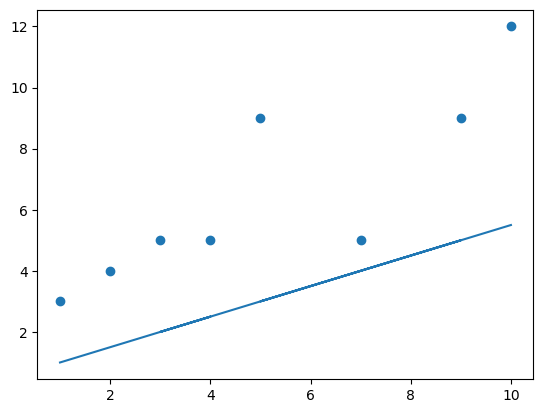

In [6]:
# mannualy try difference lines (practically not needed)
b0=0.5
b1=0.5
y_pred= b0+b1*X.exprience
plt.scatter(X.exprience,y)
plt.plot(X.exprience,y_pred)
plt.show()

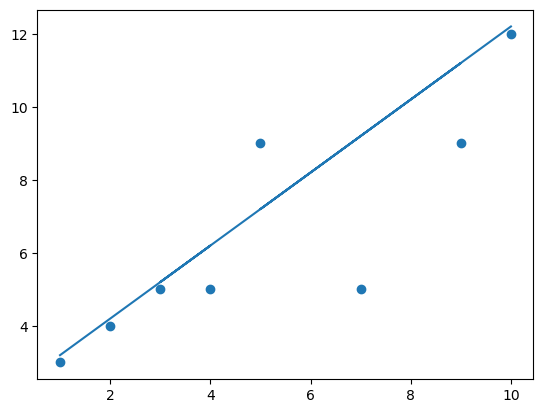

In [7]:
# mannualy try difference lines (practically not needed)
b0=2.2
b1=1
y_pred= b0+b1*X.exprience
plt.scatter(X.exprience,y)
plt.plot(X.exprience,y_pred)
plt.show()

In [8]:
# manually calculate b0 and b1 (practically not needed once we learn to build the model)

In [9]:
x_bar=np.mean(X.exprience)
y_bar=np.mean(y)
b1=np.sum((X.exprience-x_bar)*(y-y_bar))/(np.sum((X.exprience-x_bar)**2))
print('b1',b1)
b0=y_bar-b1*x_bar
print('b0',b0)

b1 0.8080133555926544
b0 2.358931552587646


In [10]:
x_bar=np.mean(X.exprience)
y_bar=np.mean(y)
num=np.sum((X.exprience-x_bar)*(y-y_bar))
den=np.sum((X.exprience-x_bar)**2)
b1=num/den
print('b1',b1)
b0=y_bar-b1*x_bar
print('b0',b0)

b1 0.8080133555926544
b0 2.358931552587646


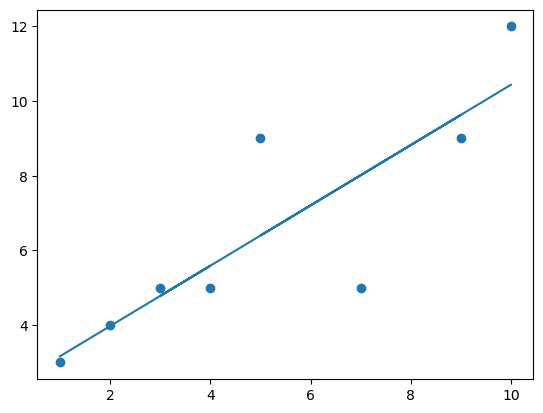

In [11]:
# draw best fit line
y_pred=b0+b1*X.exprience
plt.scatter(X.exprience,y)
plt.plot(X.exprience,y_pred)
plt.show()

In [12]:
# build Linear Regression model using Statsmodels
import statsmodels.api as sm

In [13]:
Xc= sm.add_constant(X)
Xc

,const,exprience
0,1.0,1
1,1.0,2
2,1.0,4
3,1.0,3
4,1.0,7
5,1.0,9
6,1.0,5
7,1.0,10


In [14]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

C:\Users\jainh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     15.34
Date:                Sat, 15 Apr 2023   Prob (F-statistic):            0.00783
Time:                        09:34:23   Log-Likelihood:                -14.836
No. Observations:                   8   AIC:                             33.67
Df Residuals:                       6   BIC:                             33.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3589      1.231      1.916      0.104      -0.654       5.372
exprience      0.8080      0.206      3.917      0.008       0.303       1.313
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.065
Skew:                          -0.219   Prob(JB):                        0.968
Kurtosis:                       2.947   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# get predicted y


In [16]:
# method 1
ols_model.params

const        2.358932
exprience    0.808013
dtype: float64

In [17]:
y_pred= ols_model.params[0]+ols_model.params[1]*X.exprience
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
Name: exprience, dtype: float64

In [18]:
# method 2
y_pred= ols_model.predict(Xc)
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
dtype: float64

In [19]:
# method 3 
y_pred=ols_model.fittedvalues
y_pred

0     3.166945
1     3.974958
2     5.590985
3     4.782972
4     8.015025
5     9.631052
6     6.398998
7    10.439065
dtype: float64

In [20]:
# manually calculate R
SST=np.sum((y-y_bar)**2)
print('SST',SST)
SSR=np.sum((y_pred-y_bar)**2)
print('SSR',SSR)
SSE=np.sum((y-y_pred)**2)
print('SSE',SSE)

SST 68.0
SSR 48.88480801335565
SSE 19.115191986644398


In [21]:
SST=SSR+SSE
print('SST',SST)

SST 68.00000000000006


In [22]:
# Calculate R2
R2=SSR/SST
print('R2',R2)

R2 0.7188942354905237


In [23]:
# Calculate Adj R2
n=8
k=1
adj_r2=1-(1-R2)*(n-1)/(n-k-1)
adj_r2

0.6720432747389442

In [24]:
# Manual calculate f_stat
f_stat=((SSR/k)/(SSE/(n-k-1)))
print('f_stat',f_stat)

f_stat 15.34427947598256


In [25]:
# calculate t_stat,pval
t_stat=0.8080/0.206
print('t_stat',t_stat)


t_stat 3.922330097087379


In [26]:
import scipy.stats as stats

In [27]:
pval=(stats.t.sf(t_stat,df=8-2))*2
print('pval',pval)

pval 0.007781095985285506


In [28]:
pval=(stats.t.sf(abs(t_stat),df=8-2))*2
print('pval',pval)

pval 0.007781095985285506


# 2_Multilinear_Regression- means 2 or more variables

In [29]:
pd.set_option('display.max_rows',None)
df1=pd.read_csv('hRUoRL.csv')
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [31]:
X=df1.drop('PRICE',axis=1)
y=df1['PRICE']

In [32]:
Xc=sm.add_constant(X)

In [33]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        09:34:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""